### Importing pandas and pandas_reader to download financial data from yahoo finance

In [115]:
import pandas as pd 
import numpy as np

from pandas_datareader import data as pdr

# Added the below package
import fix_yahoo_finance as yf

import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans 
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import normalize
from  scipy.cluster.hierarchy import linkage, dendrogram 

from sklearn.manifold import TSNE

%matplotlib inline

### Selecting the source as yahoo - can change it to google as well 
### Taking 2 years data for creating clusters on returns of stocks for a given portfolio
### the given portfolio is of NIFTY but any collection of stocks can be given

In [116]:
# Added the below statement
yf.pdr_override()

#source = 'yahoo'

In [117]:
start_date = '2017-01-01'
end_date = '2018-01-01'

### getting the list of stocks from NIFTY's website in csv file ind_nifty50list.csv

In [118]:
df = pd.read_csv ('ind_nifty50list.csv')
df.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Ambuja Cements Ltd.,CEMENT & CEMENT PRODUCTS,AMBUJACEM,EQ,INE079A01024
2,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
3,Aurobindo Pharma Ltd.,PHARMA,AUROPHARMA,EQ,INE406A01037
4,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034


### for yahoo data source adding .NS for NSE stock exchange prices 

In [119]:
list_Stocks = df['Symbol'].values

tickers  =  []
for ticker in list_Stocks:
    tickers = tickers +  [ticker + '.NS']
tickers


['ADANIPORTS.NS',
 'AMBUJACEM.NS',
 'ASIANPAINT.NS',
 'AUROPHARMA.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'INFRATEL.NS',
 'BOSCHLTD.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GAIL.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDPETRO.NS',
 'HINDUNILVR.NS',
 'HDFC.NS',
 'ITC.NS',
 'ICICIBANK.NS',
 'IBULHSGFIN.NS',
 'IOC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'LUPIN.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'UPL.NS',
 'ULTRACEMCO.NS',
 'VEDL.NS',
 'WIPRO.NS',
 'YESBANK.NS',
 'ZEEL.NS']

### reading the data from yahoo 
### got the data as a panel 

In [120]:
panel_data =  pdr.get_data_yahoo(tickers, start_date, end_date)


[*********************100%***********************]  50 of 50 downloaded


In [121]:
panel_data

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 249 (major_axis) x 50 (minor_axis)
Items axis: Open to Volume
Major_axis axis: 2017-01-02 00:00:00 to 2018-01-01 00:00:00
Minor_axis axis: ADANIPORTS.NS to ZEEL.NS

### getting the Adjusted close prices and creating a dataframe of that 

In [122]:
close = panel_data.loc['Adj Close']

In [123]:
close.head()

,ADANIPORTS.NS,AMBUJACEM.NS,ASIANPAINT.NS,AUROPHARMA.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BHARTIARTL.NS,BOSCHLTD.NS,BPCL.NS,...,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,272.900574,208.623383,898.186646,671.502869,443.393616,2546.928467,867.810425,308.217255,20945.308594,395.717285,...,487.049988,380.404999,2310.274902,476.719666,3363.121094,653.326965,192.333588,232.946259,219.733551,449.302490
2017-01-03,273.050110,209.206665,890.194031,668.222351,450.820648,2567.217773,881.724487,301.725891,20649.935547,401.926422,...,481.100006,377.178436,2317.025391,480.187592,3318.579834,649.706482,191.201935,230.698563,223.236938,455.968384
2017-01-04,273.996979,206.241608,900.122620,663.003479,448.691559,2630.829834,869.655701,311.091309,20191.437500,404.954132,...,486.649994,379.188751,2328.032227,489.028412,3293.341553,662.155029,188.721069,234.946976,223.284943,456.266876
2017-01-05,286.555573,208.380356,909.951965,682.189270,453.593384,2669.300781,897.433960,318.226898,20754.382813,415.611572,...,502.149994,392.141296,2283.907227,476.817352,3374.593018,669.148010,198.165817,237.318176,232.316910,468.305328
2017-01-06,285.110321,206.679092,922.859070,688.302856,450.771149,2653.618408,876.188782,316.888947,20960.402344,410.761017,...,497.750000,392.375916,2232.053955,458.891510,3314.639648,654.566895,200.733765,232.155869,239.333267,460.743988


In [124]:
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='D')

In [125]:
all_weekdays

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
               '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30',
               '2017-12-31', '2018-01-01'],
              dtype='datetime64[ns]', length=366, freq='D')

### for all the holidays where there is no data - filling it with the previous day prices 

In [126]:
close = close.reindex(all_weekdays)


In [127]:
# Check for missing values
print('Number of missing values across columns:\n', close.isnull().sum())

Number of missing values across columns:
 ADANIPORTS.NS    117
AMBUJACEM.NS     117
ASIANPAINT.NS    117
AUROPHARMA.NS    117
AXISBANK.NS      117
BAJAJ-AUTO.NS    117
BAJFINANCE.NS    117
BHARTIARTL.NS    117
BOSCHLTD.NS      117
BPCL.NS          117
CIPLA.NS         117
COALINDIA.NS     117
DRREDDY.NS       117
EICHERMOT.NS     117
GAIL.NS          117
HCLTECH.NS       117
HDFC.NS          117
HDFCBANK.NS      117
HEROMOTOCO.NS    117
HINDALCO.NS      117
HINDPETRO.NS     117
HINDUNILVR.NS    117
IBULHSGFIN.NS    117
ICICIBANK.NS     117
INDUSINDBK.NS    117
INFRATEL.NS      117
INFY.NS          117
IOC.NS           117
ITC.NS           117
KOTAKBANK.NS     117
LT.NS            117
LUPIN.NS         117
M&M.NS           117
MARUTI.NS        117
NTPC.NS          117
ONGC.NS          117
POWERGRID.NS     117
RELIANCE.NS      117
SBIN.NS          117
SUNPHARMA.NS     117
TATAMOTORS.NS    117
TATASTEEL.NS     117
TCS.NS           117
TECHM.NS         117
ULTRACEMCO.NS    117
UPL.NS       

In [128]:

close = close.fillna(method='ffill')

close = close.fillna (method = 'bfill')

In [129]:
close.head()

,ADANIPORTS.NS,AMBUJACEM.NS,ASIANPAINT.NS,AUROPHARMA.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BHARTIARTL.NS,BOSCHLTD.NS,BPCL.NS,...,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS
2017-01-01,272.900574,208.623383,898.186646,671.502869,443.393616,2546.928467,867.810425,308.217255,20945.308594,395.717285,...,487.049988,380.404999,2310.274902,476.719666,3363.121094,653.326965,192.333588,232.946259,219.733551,449.302490
2017-01-02,272.900574,208.623383,898.186646,671.502869,443.393616,2546.928467,867.810425,308.217255,20945.308594,395.717285,...,487.049988,380.404999,2310.274902,476.719666,3363.121094,653.326965,192.333588,232.946259,219.733551,449.302490
2017-01-03,273.050110,209.206665,890.194031,668.222351,450.820648,2567.217773,881.724487,301.725891,20649.935547,401.926422,...,481.100006,377.178436,2317.025391,480.187592,3318.579834,649.706482,191.201935,230.698563,223.236938,455.968384
2017-01-04,273.996979,206.241608,900.122620,663.003479,448.691559,2630.829834,869.655701,311.091309,20191.437500,404.954132,...,486.649994,379.188751,2328.032227,489.028412,3293.341553,662.155029,188.721069,234.946976,223.284943,456.266876
2017-01-05,286.555573,208.380356,909.951965,682.189270,453.593384,2669.300781,897.433960,318.226898,20754.382813,415.611572,...,502.149994,392.141296,2283.907227,476.817352,3374.593018,669.148010,198.165817,237.318176,232.316910,468.305328


### Caluclating daily returns by ratio of current adj close/ previous adj close - 1

In [130]:
daily_return = close.copy()

In [131]:
daily_return = (close / close.shift(1)) - 1

In [132]:
daily_return.head()

,ADANIPORTS.NS,AMBUJACEM.NS,ASIANPAINT.NS,AUROPHARMA.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BHARTIARTL.NS,BOSCHLTD.NS,BPCL.NS,...,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-03,0.000548,0.002796,-0.008899,-0.004885,0.016750,0.007966,0.016034,-0.021061,-0.014102,0.015691,...,-0.012216,-0.008482,0.002922,0.007275,-0.013244,-0.005542,-0.005884,-0.009649,0.015944,0.014836
2017-01-04,0.003468,-0.014173,0.011153,-0.007810,-0.004723,0.024779,-0.013688,0.031039,-0.022203,0.007533,...,0.011536,0.005330,0.004750,0.018411,-0.007605,0.019160,-0.012975,0.018415,0.000215,0.000655
2017-01-05,0.045835,0.010370,0.010920,0.028938,0.010925,0.014623,0.031942,0.022937,0.027880,0.026318,...,0.031850,0.034159,-0.018954,-0.024970,0.024671,0.010561,0.050046,0.010092,0.040450,0.026385


### setting the first row as 0 since the previous to i st row is not known 

In [133]:
daily_return.iloc[0, :] = 0

In [134]:
daily_return.head()

,ADANIPORTS.NS,AMBUJACEM.NS,ASIANPAINT.NS,AUROPHARMA.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BHARTIARTL.NS,BOSCHLTD.NS,BPCL.NS,...,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS
2017-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-03,0.000548,0.002796,-0.008899,-0.004885,0.016750,0.007966,0.016034,-0.021061,-0.014102,0.015691,...,-0.012216,-0.008482,0.002922,0.007275,-0.013244,-0.005542,-0.005884,-0.009649,0.015944,0.014836
2017-01-04,0.003468,-0.014173,0.011153,-0.007810,-0.004723,0.024779,-0.013688,0.031039,-0.022203,0.007533,...,0.011536,0.005330,0.004750,0.018411,-0.007605,0.019160,-0.012975,0.018415,0.000215,0.000655
2017-01-05,0.045835,0.010370,0.010920,0.028938,0.010925,0.014623,0.031942,0.022937,0.027880,0.026318,...,0.031850,0.034159,-0.018954,-0.024970,0.024671,0.010561,0.050046,0.010092,0.040450,0.026385


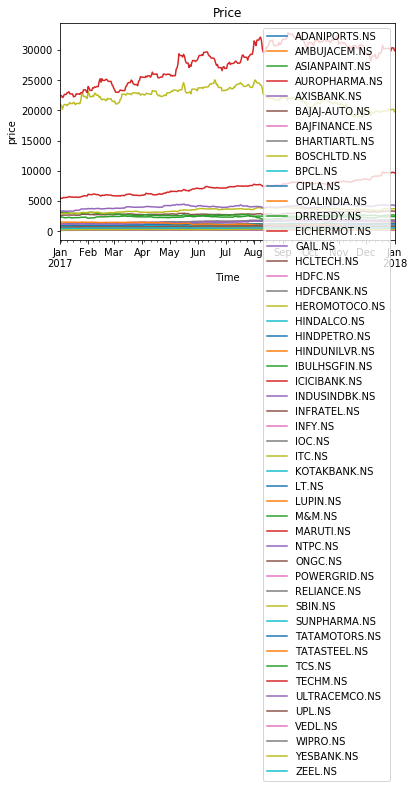

In [135]:
ax = close.plot(title = 'Price' )
ax.set_xlabel('Time')
ax.set_ylabel('price')
plt.show()

### moving it to same scale so that its easier to understand the daily returns. these are called normalized returns 

In [136]:
normalized_returns = close/close.iloc[0]

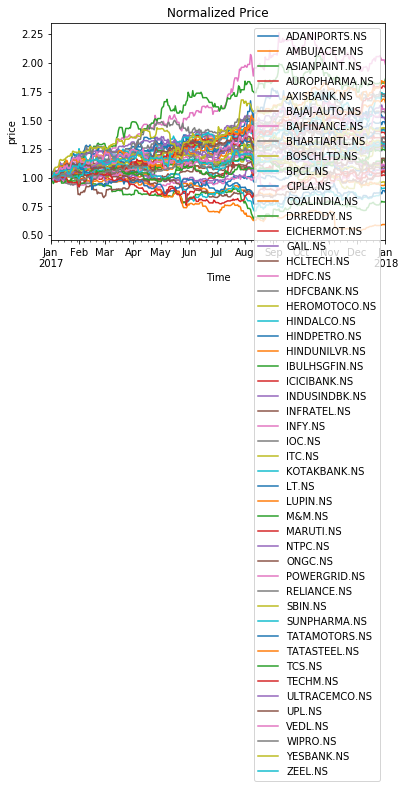

In [137]:
ax = normalized_returns.plot(title = 'Normalized Price')
ax.set_xlabel('Time')
ax.set_ylabel('price')
plt.show()

# Data preparation for Unsupervised learning 

### To create a diversified portfolio of stocks we will cluster them 
### and then identify one stock from each cluster that is closest to the center of the cluster 

# Clustering

In [138]:
daily_return.std()

ADANIPORTS.NS    0.014438
AMBUJACEM.NS     0.010655
ASIANPAINT.NS    0.009755
AUROPHARMA.NS    0.016741
AXISBANK.NS      0.014087
BAJAJ-AUTO.NS    0.009089
BAJFINANCE.NS    0.015689
BHARTIARTL.NS    0.015106
BOSCHLTD.NS      0.011499
BPCL.NS          0.013553
CIPLA.NS         0.012021
COALINDIA.NS     0.010983
DRREDDY.NS       0.014528
EICHERMOT.NS     0.012088
GAIL.NS          0.013735
HCLTECH.NS       0.009884
HDFC.NS          0.009772
HDFCBANK.NS      0.007004
HEROMOTOCO.NS    0.010196
HINDALCO.NS      0.016122
HINDPETRO.NS     0.018419
HINDUNILVR.NS    0.009383
IBULHSGFIN.NS    0.014500
ICICIBANK.NS     0.014590
INDUSINDBK.NS    0.009940
INFRATEL.NS      0.017711
INFY.NS          0.011695
IOC.NS           0.014177
ITC.NS           0.013303
KOTAKBANK.NS     0.009479
LT.NS            0.010469
LUPIN.NS         0.014685
M&M.NS           0.010063
MARUTI.NS        0.009282
NTPC.NS          0.010498
ONGC.NS          0.010992
POWERGRID.NS     0.009778
RELIANCE.NS      0.012955
SBIN.NS     

In [139]:
daily_return.mean()

ADANIPORTS.NS    0.001147
AMBUJACEM.NS     0.000695
ASIANPAINT.NS    0.000708
AUROPHARMA.NS    0.000183
AXISBANK.NS      0.000764
BAJAJ-AUTO.NS    0.000740
BAJFINANCE.NS    0.002001
BHARTIARTL.NS    0.001565
BOSCHLTD.NS     -0.000089
BPCL.NS          0.000690
CIPLA.NS         0.000293
COALINDIA.NS    -0.000095
DRREDDY.NS      -0.000555
EICHERMOT.NS     0.000855
GAIL.NS          0.001364
HCLTECH.NS       0.000261
HDFC.NS          0.000965
HDFCBANK.NS      0.001239
HEROMOTOCO.NS    0.000700
HINDALCO.NS      0.001604
HINDPETRO.NS     0.001289
HINDUNILVR.NS    0.001420
IBULHSGFIN.NS    0.001796
ICICIBANK.NS     0.000977
INDUSINDBK.NS    0.001155
INFRATEL.NS      0.000481
INFY.NS          0.000236
IOC.NS           0.000849
ITC.NS           0.000363
KOTAKBANK.NS     0.000964
LT.NS            0.001022
LUPIN.NS        -0.001325
M&M.NS           0.000626
MARUTI.NS        0.001624
NTPC.NS          0.000320
ONGC.NS          0.000149
POWERGRID.NS     0.000340
RELIANCE.NS      0.001536
SBIN.NS     

In [140]:
# Before transposing daily_return

x = daily_return.std().tolist() # standard deviation of daily_return of each ticker
y = daily_return.mean().tolist() # average daily_return of each ticker

In [141]:
from sklearn.cluster import KMeans

data = pd.DataFrame({'std_dev':x, 'avg':y})
#data

#Convert DataFrame to matrix
data_mat = data.as_matrix()

cluster_range = range(1, 15)
cluster_errors = []
for num in cluster_range:
    k_means = KMeans(n_clusters=num)
    k_means.fit(data_mat)
    cluster_errors.append(k_means.inertia_) # within sum of square errors

clusters_df = pd.DataFrame({"num_clusters":cluster_range, "cluster_errors":cluster_errors})
clusters_df

,cluster_errors,num_clusters
0,0.000390,1
1,0.000116,2
2,0.000069,3
3,0.000048,4
4,0.000038,5
5,0.000029,6
6,0.000021,7
7,0.000018,8
8,0.000015,9
9,0.000013,10


Text(0.5,1,'Cluster_errors v/s No. of clusters')

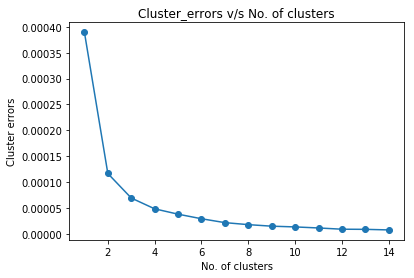

In [142]:
# Elbow plot
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# Title and axis
plt.xlabel('No. of clusters')
plt.ylabel('Cluster errors')
plt.title('Cluster_errors v/s No. of clusters')

In [143]:
# After No. of clusters=5, the cluster errors converge

num_clusters = 5  

k_means = KMeans(n_clusters = num_clusters)
k_means.fit(data_mat)

# Cluster label for each ticker
labels = k_means.labels_
cluster_labels = labels.tolist()
print('\ncluster_labels\n', cluster_labels)

# To find unique labels
unique_labels = list(set(cluster_labels))
print('\nunique_labels\n', unique_labels)

# Cluster centroids
cluster_centroids = np.array(k_means.cluster_centers_)
print('\ncluster_centroids\n', cluster_centroids)

# results
results = pd.DataFrame([data.index, labels]).T
results.columns = ['Ticker_index', 'Cluster_label']


# Dataframe with Ticker_name, Ticker_index, Cluster_label
tick_df = pd.DataFrame({'Ticker_name':tickers})
result_df = pd.DataFrame()
result_df = pd.concat([tick_df, results], axis=1)
#result_df

# Sort result_df by cluster label
sorted_df = result_df.sort_values('Cluster_label')
sorted_df



cluster_labels
 [0, 1, 1, 2, 0, 1, 2, 0, 4, 0, 4, 4, 3, 4, 0, 1, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 4, 0, 0, 1, 1, 3, 1, 1, 1, 4, 1, 0, 2, 3, 3, 0, 1, 0, 4, 4, 2, 1, 0, 4]

unique_labels
 [0, 1, 2, 3, 4]

cluster_centroids
 [[ 0.00108188  0.01396437]
 [ 0.00082786  0.00972391]
 [ 0.00110826  0.01716977]
 [-0.00056862  0.01493652]
 [ 0.00036587  0.01163479]]


,Ticker_name,Ticker_index,Cluster_label
0,ADANIPORTS.NS,0,0
48,YESBANK.NS,48,0
27,INDUSINDBK.NS,27,0
28,INFY.NS,28,0
14,EICHERMOT.NS,14,0
23,ITC.NS,23,0
9,INFRATEL.NS,9,0
22,HDFC.NS,22,0
37,RELIANCE.NS,37,0
41,TATAMOTORS.NS,41,0


In [144]:
from sklearn.metrics import pairwise_distances_argmin_min

closest_ticker_ids = []
ticker_indices_within_i_cluster = []

# Converting data_mat list
data_list = data_mat.tolist()
#print('type(data_list)', type(data_list))
#print('len(data_list)', len(data_list))
#print('data_list', data_list)

for i in range(0, num_clusters):
    
    clust_centroid = cluster_centroids[i]
    #print('\nCluster centroid for cluster {}'.format(i))
    #print(clust_centroid)
    
    ticker_indices_within_i_cluster = result_df.loc[result_df['Cluster_label'] == i, 'Ticker_index'].tolist()
    #print('\nTicker indices in cluster {}'.format(i))
    #print(ticker_indices_within_i_cluster)   

    one_cluster_data_mat = np.zeros((len(ticker_indices_within_i_cluster), cluster_centroids.shape[1]))
    #print('\nInitially one_cluster_data_mat has zero values\n', one_cluster_data_mat)
    
    for row_num, data_idx in enumerate(ticker_indices_within_i_cluster):
        one_row = data_mat[data_idx]
        #print('\none_row', one_row)
        one_cluster_data_mat[row_num] = one_row
        #print('\none_cluster_data_mat[row_num]', one_cluster_data_mat)
   # print('\n')    
    #print('one_cluster_data_mat filled with co-ordinates of ticker_ids of a cluster\n', one_cluster_data_mat)

    closest, distances = pairwise_distances_argmin_min(clust_centroid.reshape(1, -1), one_cluster_data_mat)    
    closest_idx_in_one_cluster_data_mat = closest[0]
    closest_data_row_num = ticker_indices_within_i_cluster[closest_idx_in_one_cluster_data_mat]    
    #print('\nclosest_data_row_num', closest_data_row_num)
    
    data_id = data_mat[closest_data_row_num]
    data_id_list = data_id.tolist()
    #print('\ndata_id_list', data_id_list)
    #print('\ntype(data_id_list)', type(data_id_list))    
   
    ticker_id = data_list.index(data_id_list)
   # print('\nticker_id', ticker_id)
   
    closest_ticker_ids.append(ticker_id)


In [145]:

print('\n\n*************** We can create stock-portfolio of the below ticker_ids ***************')
print('\nFor cluster numbers 0,1,2,3,4 ticker_ids closest to their respective cluster_centroids are {}'.format(closest_ticker_ids))




*************** We can create stock-portfolio of the below ticker_ids ***************

For cluster numbers 0,1,2,3,4 ticker_ids closest to their respective cluster_centroids are [48, 2, 46, 40, 26]


In [171]:
# ticker_names
ticker_names = pd.DataFrame()

for ticker_id in closest_ticker_ids:
    temp = pd.DataFrame(result_df.loc[result_df['Ticker_index'] == ticker_id, 'Ticker_name'])
    #print(temp)
    ticker_names = ticker_names.append(temp)

ticker_names = ticker_names.reset_index()
ticker_names.columns = ['Ticker_index', 'Ticker_name']

ticker_names.to_csv('trading_indicators.csv')
ticker_names

,Ticker_index,Ticker_name
0,48,YESBANK.NS
1,2,ASIANPAINT.NS
2,46,VEDL.NS
3,40,TCS.NS
4,26,IOC.NS


Text(0.5,1,'Clustering')

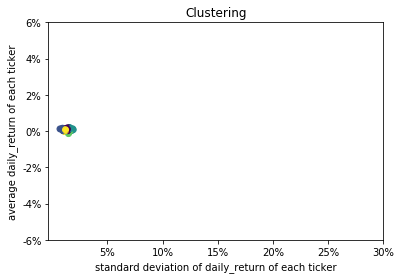

In [147]:
#Annotations having ticker number from 'ticker_dict' for readability

plt.scatter(x, y, c=labels)
# Title and axis
plt.xlabel('standard deviation of daily_return of each ticker')
plt.ylabel('average daily_return of each ticker')
plt.xticks([0.05, 0.10, 0.15, 0.20, 0.25, 0.30], ['5%', '10%', '15%', '20%', '25%', '30%'])
plt.yticks([-0.06, -0.04, -0.02, 0, 0.02, 0.04, 0.06], ['-6%', '-4%', '-2%', '0%', '2%', '4%', '6%'])
plt.title('Clustering')

### Transposing the dataframe so that rows become columns and columns become rows. 
### this is needed since our feature is daily returns. 

In [148]:
daily_return = daily_return.reset_index()

In [149]:
daily_return = daily_return.transpose()

In [150]:
daily_return = daily_return.reset_index()

In [151]:
columns = daily_return.iloc[0]

In [152]:
daily_return = daily_return.rename(columns=columns)
daily_return = daily_return.drop (daily_return.index[[0]])
daily_return = daily_return.reset_index()

In [153]:
daily_return.drop ('level_0' , axis = 1, inplace = True)

In [154]:
daily_return.head()

,index,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,...,2017-12-23 00:00:00,2017-12-24 00:00:00,2017-12-25 00:00:00,2017-12-26 00:00:00,2017-12-27 00:00:00,2017-12-28 00:00:00,2017-12-29 00:00:00,2017-12-30 00:00:00,2017-12-31 00:00:00,2018-01-01 00:00:00
0,ADANIPORTS.NS,0,0,0.00054795,0.00346775,0.0458348,-0.00504353,0,0,-0.0047193,...,0,0,0,0.00596791,-0.0008651,-0.0136071,0.0174316,0,0,-0.0147911
1,AMBUJACEM.NS,0,0,0.00279586,-0.0141729,0.0103701,-0.00816422,0,0,-0.00893708,...,0,0,0,0.0213005,-0.00731797,0.00110574,0.00165684,0,0,-0.0147032
2,ASIANPAINT.NS,0,0,-0.00889861,0.0111533,0.01092,0.0141844,0,0,-0.0208715,...,0,0,0,0.0112039,-0.00147725,-0.00404684,0.0123208,0,0,-0.0128183
3,AUROPHARMA.NS,0,0,-0.00488534,-0.00781008,0.0289377,0.00896172,0,0,0.00310513,...,0,0,0,0.00352266,0.0103115,-0.0106405,0.00665786,0,0,-0.00581441
4,AXISBANK.NS,0,0,0.0167504,-0.0047227,0.0109247,-0.00622195,0,0,-0.00538228,...,0,0,0,0.00252895,-0.000720764,-0.013974,0.0312701,0,0,0.00274845


In [155]:
companies = daily_return['index']

### Droping the index column of stock names 

In [156]:
df = daily_return.drop ('index', axis = 1)

### we will make a pipeline for Normalizing the data and then applying KMeans Algorithm 

In [157]:
normalizer = Normalizer ()

In [158]:
kmeans = KMeans(n_clusters = 5)

In [159]:
pipeline = make_pipeline (normalizer, kmeans)

In [160]:
pipeline.fit(df)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [161]:
labels = pipeline.predict (df)

In [162]:
mydf = pd.DataFrame ({ 'labels': labels,'companies': companies })

In [163]:
mydf.sort_values('labels')

,companies,labels
23,ICICIBANK.NS,0
30,LT.NS,0
44,ULTRACEMCO.NS,0
4,AXISBANK.NS,0
14,GAIL.NS,0
7,BHARTIARTL.NS,0
38,SBIN.NS,0
34,NTPC.NS,0
0,ADANIPORTS.NS,1
32,M&M.NS,1


### find the distance from centroid for each stock to its cluster so that we can select the nearest one 

### creating a dendogram

In [164]:
normalized_movements = normalize(df)

In [165]:
mergings = linkage (normalized_movements, method = 'complete')

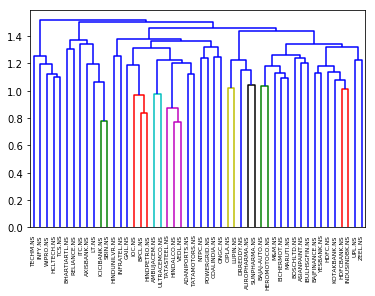

In [166]:
dendrogram (mergings, labels = mydf['companies'].values, leaf_font_size = 6 , leaf_rotation=90)
plt.show()

In [167]:
model = TSNE(learning_rate = 50)

In [168]:
tsne_features = model.fit_transform (normalized_movements)

In [169]:
# Select the 0th feature: xs
xs = tsne_features[:, 0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

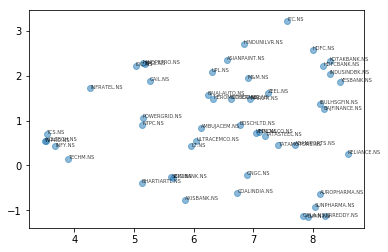

In [170]:
# Scatter plot
plt.scatter (xs, ys, alpha = 0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()